In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsplus as sp
plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

In [2]:
function_type = type(lambda: 0)
def sum_of_distribution(f: function_type, N: int, K: int = 10000, extra_information: bool = True):
    """
    f must be a function that takes the parameter K
    to generate K random numbers as a numpy array.
    N is the number of times f function is sampled and added.
    """
    sumX = np.zeros(K)
    if extra_information:
        means = np.array([])
        stdvs = np.array([])
    for n in range(N):
        sample = np.array(f(K)) 
        sumX += sample
        if extra_information:
            means = np.append(means, sample.mean())
            stdvs = np.append(stdvs, sample.std())
    if extra_information:
        return sumX, means, stdvs
    return sumX

4496.0600586580695 671.755487413895


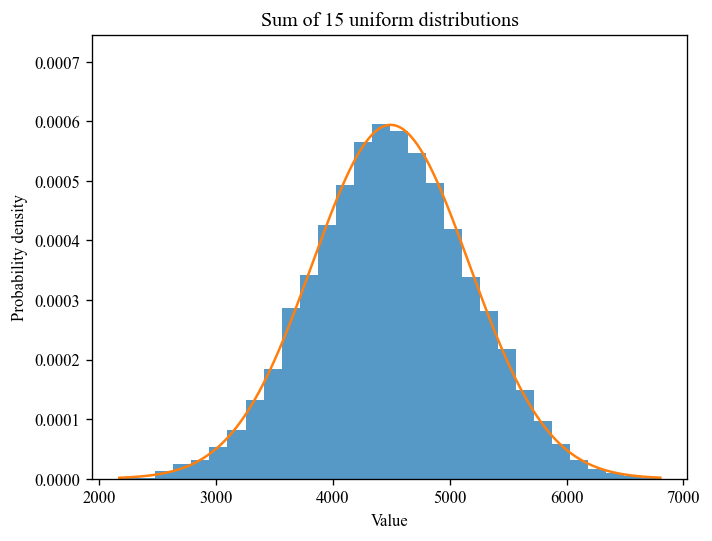

In [3]:
nbins = 30
nsums = 15
Y, means, stdvs = sum_of_distribution(lambda k: np.random.uniform(0, 600, k), nsums)
global_mean = sum(means)
global_stdv = np.sqrt(np.sum(stdvs ** 2))

fig, axs = plt.subplot_mosaic([["uniform"]], dpi = 120)
sp.hist_to_pdf(axs["uniform"], Y, bins = nbins, alpha = 0.75)

# Gaussian approximation
y = np.linspace(np.min(Y), np.max(Y), 1000)
axs["uniform"].plot(y, stats.norm.pdf(y, global_mean, global_stdv))
axs["uniform"].set(title = f"Sum of {nsums} uniform distributions", xlabel = "Value", ylabel = "Probability density")
print(global_mean, global_stdv)

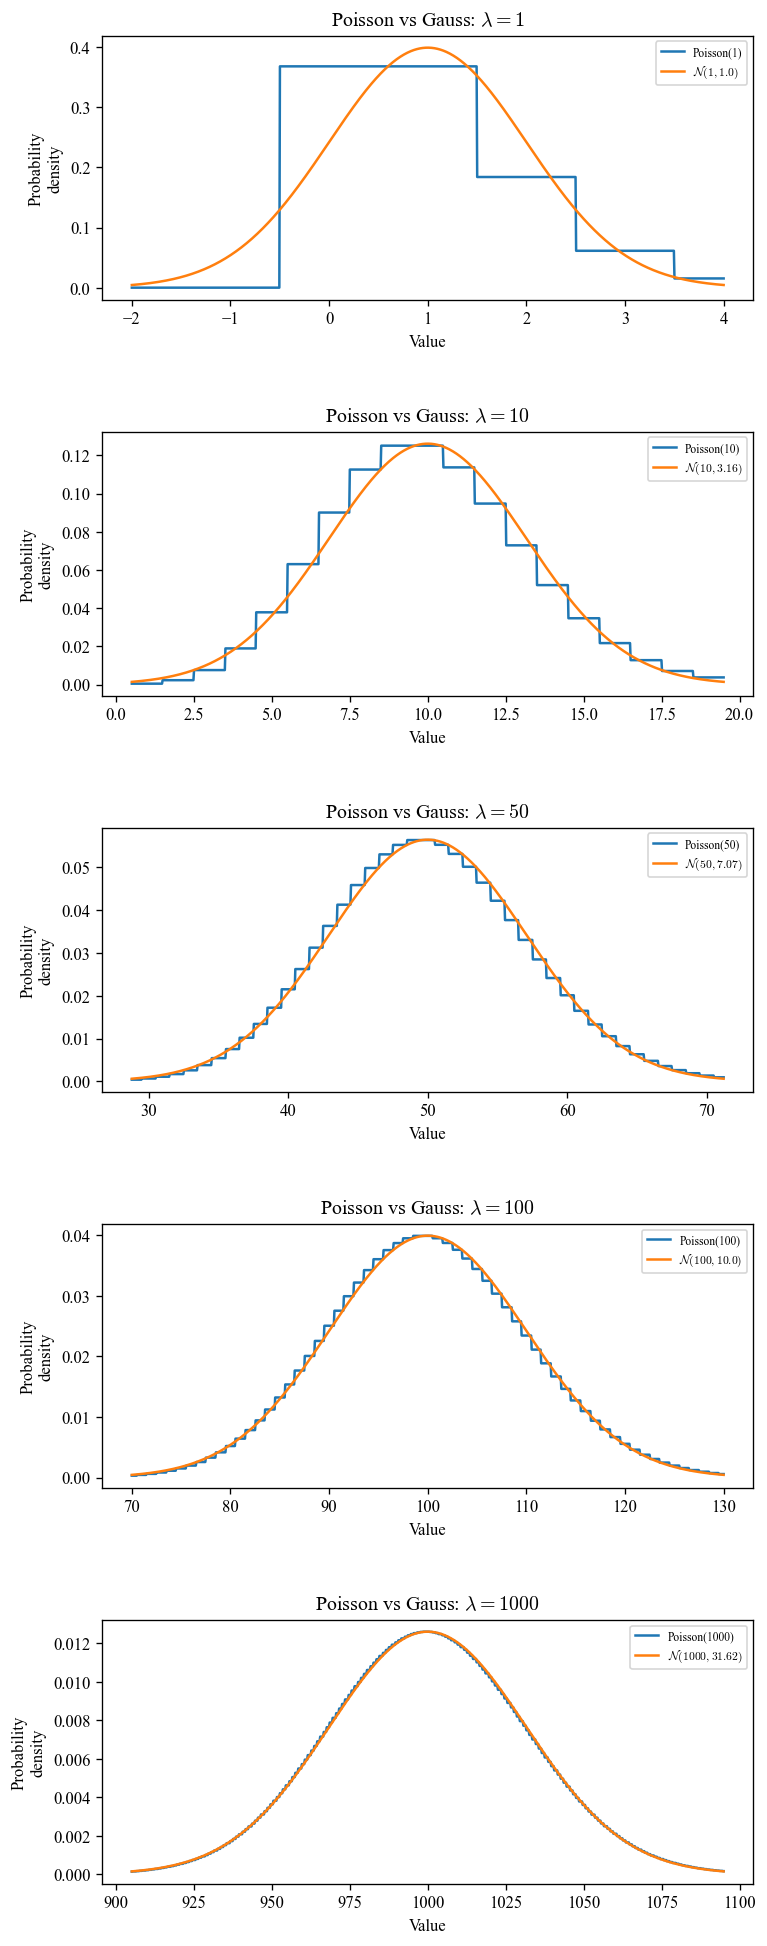

In [4]:
# Comparison of poisson with normal
lambdas = [1, 10, 50, 100, 1000]

# Plots
subplots = [[f"Poisson vs Gauss: $\\lambda = {lamb}$"] for lamb in lambdas]
fig, axs = plt.subplot_mosaic(subplots, dpi = 120, figsize = (7, 20))
for lamb, label in zip(lambdas, subplots):
    x = x = np.linspace(lamb - 3 * np.sqrt(lamb), lamb + 3 * np.sqrt(lamb), 1000)
    axs[label[0]].plot(x, sp.graph_poisson_distribution(x, lamb), label = f"Poisson({lamb})")
    axs[label[0]].plot(x, stats.norm.pdf(x, lamb, np.sqrt(lamb)), label = f"$\\mathcal{{N}}({lamb}, {round(np.sqrt(lamb), 2)})$")

for label in subplots:
    axs[label[0]].legend(fontsize = 7)
    axs[label[0]].set(title = label[0], xlabel = "Value", ylabel = "Probability\ndensity")
plt.subplots_adjust(hspace = 0.5)

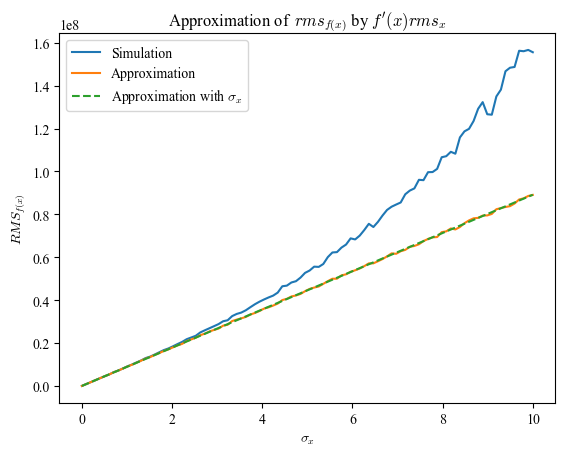

In [24]:
# Approximation for RMS of f(X)
# Approximation requires x_i ~ x_avg,
# E[f(X)] ~ f(E[X]).
import sympy

N = 10000
mu = np.random.uniform(-100, 100, 1)[0]
sigmas = np.linspace(0, 10, 100)

x = sympy.symbols('x')
f = lambda x: x**5 + 90 * x ** 3 + x**2 + 20

x_stdvs = np.array([])
f_stdvs = np.array([]) 
for s in sigmas:
    X = np.random.normal(mu, s, N)
    fX = f(X)
    x_stdvs = np.append(x_stdvs, X.std())
    f_stdvs = np.append(f_stdvs, fX.std())

fig, ax = plt.subplots()
ax.plot(sigmas, f_stdvs, label = "Simulation")
ax.plot(sigmas, f(x).diff(x).subs(x, mu) * x_stdvs, label = "Approximation")
ax.plot(sigmas, f(x).diff(x).subs(x, mu) * sigmas, linestyle = "--", label = "Approximation with $\sigma_x$")
ax.set(title = "Approximation of $\,rms_{f(x)}$ by $f'(x) rms_x$",
      xlabel = "$\sigma_x$", ylabel = "$RMS_{f(x)}$")
ax.legend()

In [ ]:
import sympy
x = sympy.symbols('x')
f = lambda x: x**2
f(x).diff(x).subs(x, 3)